# "Sklearn NLP: Bag-of-Words classification - Food Reviews"


- title: "Sklearn NLP: Bag-of-Words classification"
- toc: true
- badges: False
- comments: true
- author: Sam Treacy
- categories: [sklearn, bag_of_words, sentiment, nlp, classification, python]

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DATA/Amazon_Fine_Food_Reviews.csv')

In [3]:
df.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...


Text(0, 0.5, 'Count')

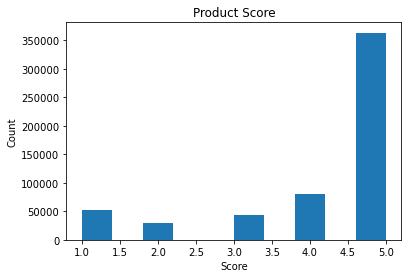

In [4]:
plt.hist(df.Score);
plt.title('Product Score')
plt.xlabel('Score')
plt.ylabel('Count')

# Create wordcloud

In [5]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [6]:
text = df.Text[0]

In [7]:
wordcloud = WordCloud().generate(text)

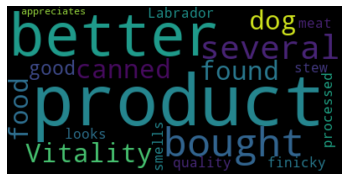

In [8]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
df.Score = df.Score.astype(int)

## Create sentiment Feature

In [10]:
# Remove Score = 3
df = df[df['Score'] != 3]


# Positive = Score > 3, Negative = Score < 3
df['sentiment'] = df['Score'].apply(lambda rating: +1 if rating >3 else -1)

## Data Cleaning

In [12]:
def remove_punctuation(text):
    cleaned = "".join(char for char in text if char not in ("?", ".", 
                                                 ";", ":",  "!",'"'))
    return cleaned

In [13]:
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

## Define Features and Target

In [14]:
y = df['sentiment']
X = df['Summary']

## Train test split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   random_state=42)


X_train.shape, y_train.shape, X_test.shape, y_test.shape

((420631,), (420631,), (105158,), (105158,))

## Create Bag of Words

In [17]:
# Count vectorizer

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')


X_train = vectorizer.fit_transform(X_train)
X_test  = vectorizer.transform(X_test)

In [163]:
Image(url= "https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/assets/atap_0401.png", width = 800)

## Build Model 

In [131]:
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, n_jobs=2, verbose=2)

model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed: 12.1min


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81

[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed: 33.9min finished


RandomForestClassifier(n_jobs=2, verbose=2)

## Evaluate predictions

In [134]:
predictions = model.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    7.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   18.7s finished


In [135]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[13282  2951]
 [ 1711 87214]]
              precision    recall  f1-score   support

          -1       0.89      0.82      0.85     16233
           1       0.97      0.98      0.97     88925

    accuracy                           0.96    105158
   macro avg       0.93      0.90      0.91    105158
weighted avg       0.95      0.96      0.95    105158



In [138]:
from sklearn.ensemble imbase_estimatorport RandomForestClassifier

model = RandomForestClassifier(n_estimators=3, n_jobs=2, verbose=2)

model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 3building tree 2 of 3

building tree 3 of 3


[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:   45.6s finished


RandomForestClassifier(n_estimators=3, n_jobs=2, verbose=2)

In [157]:
X_test.shape

(105158, 31692)

In [160]:
# Predict on new sample
model.predict(X_test[0].reshape(1 , 31692))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   3 out of   3 | elapsed:    0.0s finished


array([-1])

In [156]:
# Get parameters
model.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=217971105),
 DecisionTreeClassifier(max_features='auto', random_state=3843243),
 DecisionTreeClassifier(max_features='auto', random_state=436771207)]

## Evaluate Baseline

In [161]:
from sklearn.dummy import DummyClassifier

baseline = DummyClassifier()

baseline.fit(X_train,y_train)

predictions = baseline.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 2518 13715]
 [13884 75041]]
              precision    recall  f1-score   support

          -1       0.15      0.16      0.15     16233
           1       0.85      0.84      0.84     88925

    accuracy                           0.74    105158
   macro avg       0.50      0.50      0.50    105158
weighted avg       0.74      0.74      0.74    105158

